# 6.4 - Boat Sales: Regression Analysis

## Table of Contents

#### 1. Importing Libraries and data
#### 2. Data Cleaning
#### 3. Data Preparation - Regression Analysis
#### 4. Regression Analysis

### 01. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# check matplotlib version

matplotlib.__version__

'3.8.4'

In [3]:
# ensure the charts created will be displayed

%matplotlib inline

In [4]:
# define path 

path = r'/Users/robson/Desktop/CareerFoundry/Data Immersion/Achivement 6/Data Sets'

In [5]:
# importing dataframe

df = pd.read_pickle(os.path.join(path, 'Prepared Data', '6.2_Boat_Sales.pkl'))

### 02. Data Cleaning

##### Columns 

In [6]:
# columns

df.columns

Index(['Price', 'Boat_Type', 'Manufacturer', 'Type', 'Year_Built', 'Length',
       'Width', 'Material', 'Views_7_days', 'Location', 'Country',
       'Price_Currency', 'Price_Amount', 'Price_EUR', 'Visit_Rate',
       'Year_Built_Group'],
      dtype='object')

In [7]:
# check first 10 rows

df.head(10)

,Price,Boat_Type,Manufacturer,Type,Year_Built,Length,Width,Material,Views_7_days,Location,Country,Price_Currency,Price_Amount,Price_EUR,Visit_Rate,Year_Built_Group
1,EUR 3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,Germany » Bönningstedt,Germany,EUR,3490.0,3490.000000,Low visit rate,2002-2021
4,EUR 3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,Germany » Bayern » München,Germany,EUR,3399.0,3399.000000,Low visit rate,2002-2021
10,CHF 3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,Switzerland » Seengen,Switzerland,CHF,3500.0,3431.372549,High visit rate,1982-2001
12,EUR 3500,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,Italy » Lake Garda » Moniga del Garda (BS),Italy,EUR,3500.0,3500.000000,Low visit rate,2002-2021
13,CHF 4600,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,Switzerland » Zugersee » Neuheim,Switzerland,CHF,4600.0,4509.803922,Mid visit rate,2002-2021
14,CHF 4500,Fishing Boat,Italmarine power boats,"Used boat,Unleaded",1997,3.72,1.33,Aluminium,413,Switzerland » Vierwaldstättersee » 6004,Switzerland,CHF,4500.0,4411.764706,High visit rate,1982-2001
18,EUR 4000,Pilothouse,BÃ©nÃ©teau power boats,"Used boat,Diesel",1981,8.00,2.84,PVC,265,"France » MARTGUES, MARTIGUES",France,EUR,4000.0,4000.000000,High visit rate,1962-1981
20,EUR 3999,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,69,Germany » Bayern » München,Germany,EUR,3999.0,3999.000000,Low visit rate,2002-2021
22,EUR 3930,Sport Boat,Linder power boats,"new boat from stock,Unleaded",2020,4.31,1.64,Aluminium,90,Germany » Nordrhein-Westfalen » WSC Hopp / Mön...,Germany,EUR,3930.0,3930.000000,Low visit rate,2002-2021
23,EUR 3900,Sport Boat,Kammin power boats,"Used boat,Unleaded",1979,5.60,2.10,GRP,98,"Germany » BOOTSSERVICE ENK IN TREIS KARDEN, BO...",Germany,EUR,3900.0,3900.000000,Low visit rate,1962-1981


In [8]:
# check dataframe shape 

df.shape

(6607, 16)

##### Missing Values 

In [9]:
# check missing values

df.isnull().sum()

Price               0
Boat_Type           0
Manufacturer        0
Type                0
Year_Built          0
Length              0
Width               0
Material            0
Views_7_days        0
Location            0
Country             0
Price_Currency      0
Price_Amount        0
Price_EUR           0
Visit_Rate          0
Year_Built_Group    0
dtype: int64

##### Duplicate Values 

In [10]:
# check for duplicates in the dataframe

df.duplicated().value_counts()

False    6607
Name: count, dtype: int64

##### Extreme values checks

<Axes: xlabel='Views_7_days', ylabel='Count'>

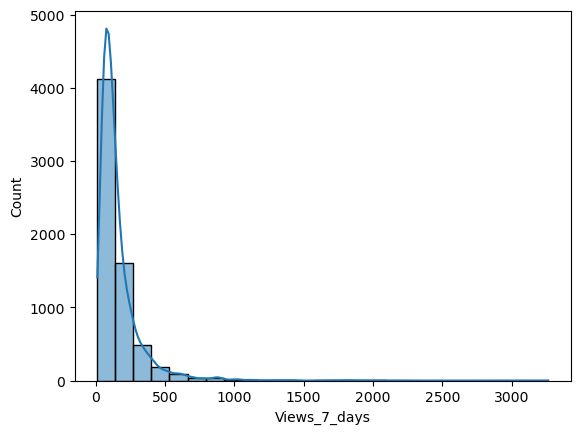

In [11]:
# histogram to visualize extreme values - Year that was built

sns.histplot(df['Views_7_days'], bins=25, kde = True) 

In [12]:
# check dataframe average

df['Views_7_days'].mean()

162.0112002421674

In [13]:
# check dataframe median

df['Views_7_days'].median()

113.0

In [14]:
# check dataframe max

df['Views_7_days'].max()

3263

In [15]:
# check dataframe min

df['Views_7_days'].min()

13

### 3. Data Preparation - Regression Analysis

In [16]:
# columns

# Ps: changing of a factor(s), X, causes a dependent variable, y, to also change in a predictable way

df.columns

Index(['Price', 'Boat_Type', 'Manufacturer', 'Type', 'Year_Built', 'Length',
       'Width', 'Material', 'Views_7_days', 'Location', 'Country',
       'Price_Currency', 'Price_Amount', 'Price_EUR', 'Visit_Rate',
       'Year_Built_Group'],
      dtype='object')

In [17]:
df[['Price_EUR','Year_Built','Views_7_days','Length','Width']].corr()

,Price_EUR,Year_Built,Views_7_days,Length,Width
Price_EUR,1.000000,0.056369,-0.032736,0.208760,0.194050
Year_Built,0.056369,1.000000,-0.194199,-0.092558,-0.083407
Views_7_days,-0.032736,-0.194199,1.000000,-0.167600,-0.183797
Length,0.208760,-0.092558,-0.167600,1.000000,0.922257
Width,0.194050,-0.083407,-0.183797,0.922257,1.000000


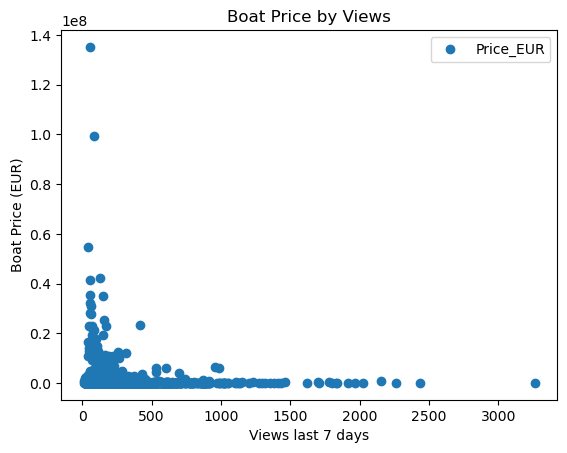

In [18]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Views_7_days', y='Price_EUR',style='o') 
plt.title('Boat Price by Views')  
plt.xlabel('Views last 7 days')  
plt.ylabel('Boat Price (EUR)')  
plt.show()

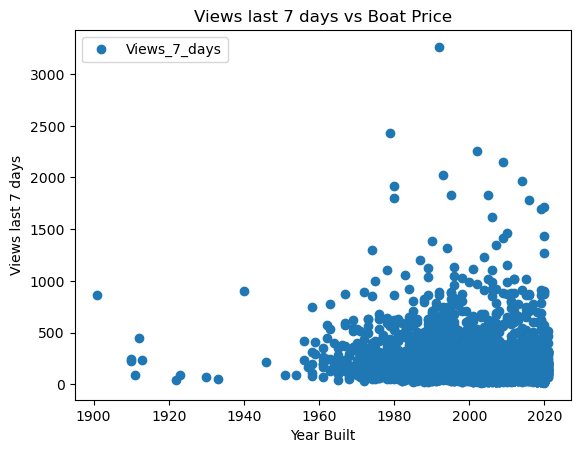

In [19]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year_Built', y='Views_7_days',style='o')
plt.title('Views last 7 days vs Boat Price')  
plt.xlabel('Year Built')  
plt.ylabel('Views last 7 days')  
plt.show()

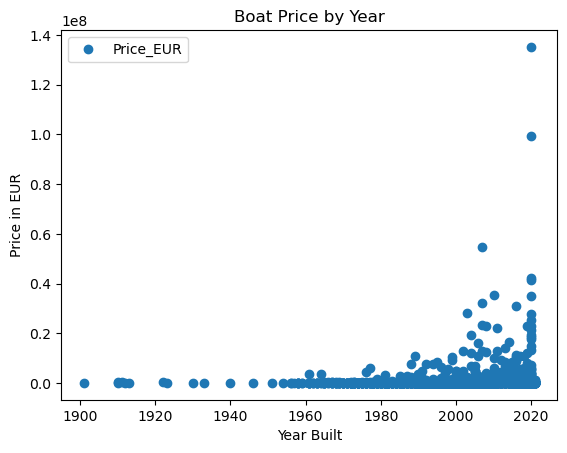

In [20]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year_Built', y='Price_EUR',style='o')
plt.title('Boat Price by Year')  
plt.xlabel('Year Built')  
plt.ylabel('Price in EUR')  
plt.show()

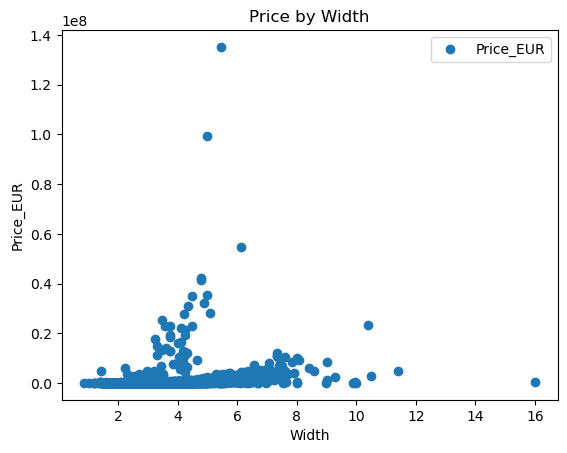

In [21]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Width', y='Price_EUR',style='o')
plt.title('Price by Width')  
plt.xlabel('Width')  
plt.ylabel('Price_EUR')  
plt.show()

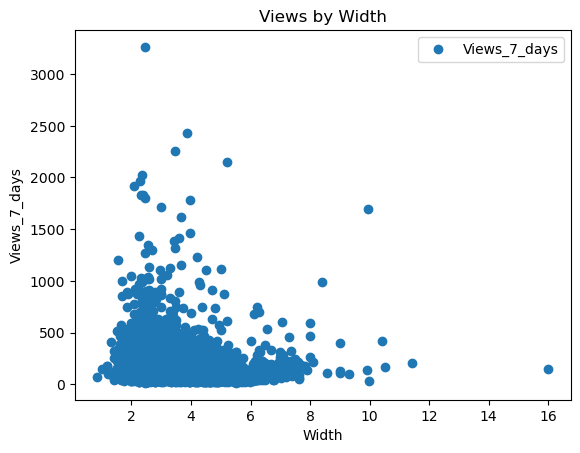

In [22]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Width', y='Views_7_days',style='o') 
plt.title('Views by Width')  
plt.xlabel('Width')  
plt.ylabel('Views_7_days')  
plt.show()

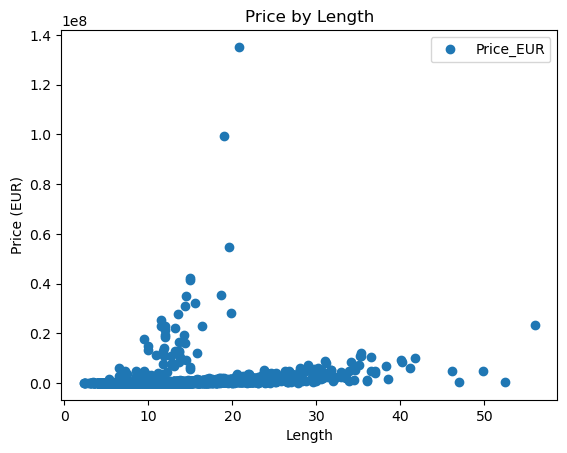

In [23]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Length', y='Price_EUR',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Price by Length')  
plt.xlabel('Length')  
plt.ylabel('Price (EUR)')  
plt.show()

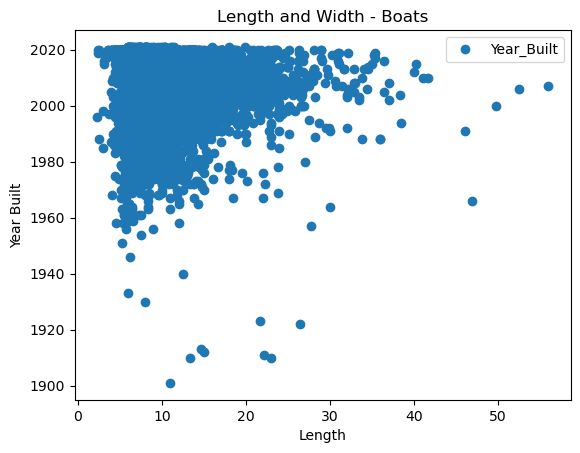

In [24]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Length', y='Year_Built',style='o') 
plt.title('Length and Width - Boats')  
plt.xlabel('Length')  
plt.ylabel('Year Built')  
plt.show()

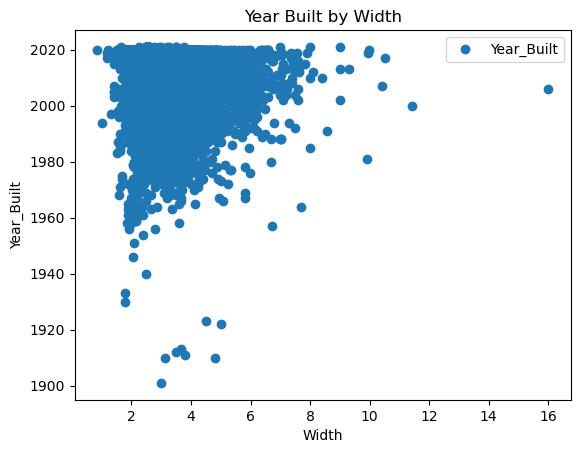

In [25]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Width', y='Year_Built',style='o')
plt.title('Year Built by Width')  
plt.xlabel('Width')  
plt.ylabel('Year_Built')  
plt.show()

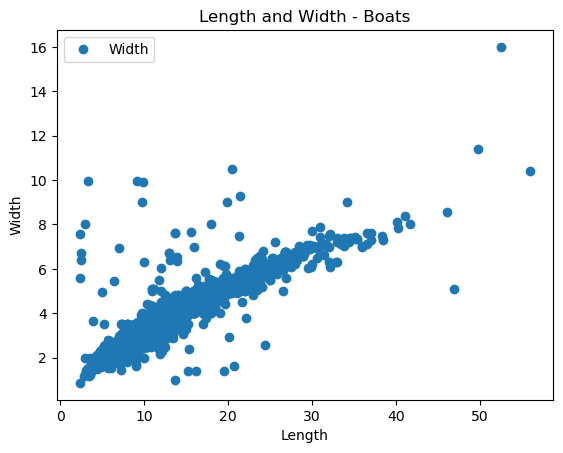

In [26]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Length', y='Width',style='o')
plt.title('Length and Width - Boats')  
plt.xlabel('Length')  
plt.ylabel('Width')  
plt.show()

###### Hypothesis: As the Length of a boat increase, so it does its width. 

###### Ps: I only developed this hipothesys because this exercise uses numerical values and, as could be seen, there is no correlation between any numerical variable in this dataset. 

In [27]:
# For the sack of this exercise, I will use both columns 'length' and 'width', as they are the only ones could generate a good regression analysis. 

X = df['Length'].values.reshape(-1,1)
y = df['Width'].values.reshape(-1,1)

In [28]:
# Check variable

X

array([[4.  ],
       [3.55],
       [4.35],
       ...,
       [6.  ],
       [4.4 ],
       [3.6 ]])

In [29]:
# Check variable

y

array([[1.5 ],
       [1.46],
       [1.75],
       ...,
       [1.62],
       [1.8 ],
       [1.6 ]])

In [30]:
# create a training and test dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression Analysis

In [31]:
# create a regression obect 

regression = LinearRegression()

In [32]:
# fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [33]:
# create a prediction of y value

y_predicted = regression.predict(X_test)

In [34]:
# check y predicted

y_predicted

array([[4.10745731],
       [3.52030848],
       [2.37829392],
       ...,
       [3.67768858],
       [3.58487468],
       [2.46303705]])

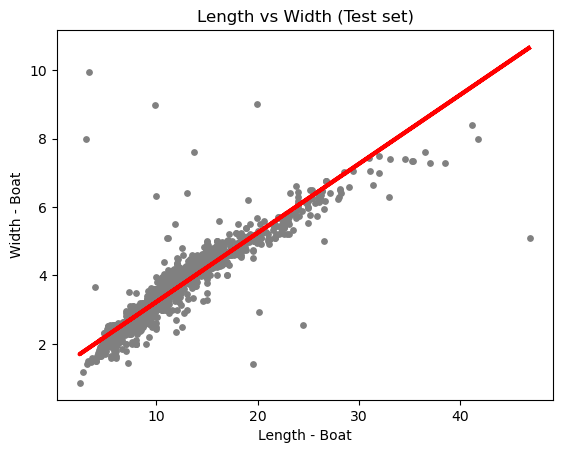

<Figure size 640x480 with 0 Axes>

In [35]:
# Create a visualization - regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Length vs Width (Test set)')
plot_test.xlabel('Length - Boat')
plot_test.ylabel('Width - Boat')
plot_test.show()

plot_test.savefig('LengthVsWidthTest.png') 

In [36]:
# create variables that contains model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # mean squared error based on y test and y predicted
r2 = r2_score(y_test, y_predicted) # r2 score based on y test and y predicted

In [37]:
# print model summary statistics

print('Slope:', regression.coef_) # How much the variable changes as X changes
print('Mean Squared Error:', rmse) # estimator that measures the average of the squared difference between the estimated values and the true values
print('R2 Score:', r2) #  how well the model explains the variance in the data

Slope: [[0.20176936]]
Mean Squared Error: 0.21290097034265207
R2 Score: 0.8347068450944202


In [38]:
# create a dataframe to compare actual and predicted - y value

df_difference = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
df_difference.head(20)

,Actual,Predicted
0,4.55,4.107457
1,3.96,3.520308
2,2.18,2.378294
3,2.88,3.165194
4,4.20,4.006573
5,5.21,5.824515
6,2.54,2.689019
7,3.99,3.802786
8,3.95,3.536450
9,4.20,3.631282


##### Analysis

###### According to the summary statistics above, as well as the dataframe, it is possible to confirm the following:

###### The slope is positive, so as the Length increase, so it does the Width. Important to highlight that this increase is low, 0.2 to be more precise.
###### Mean Squared Error is low, 0.212, which demonstrate that the difference between the estimated value and the true value is minimal. 
###### R2 Score on the other hand is 0.83, which is excellent, as it is really close to 1, indicating a good fit, with low variance. 

###### After the consideration above, it is necessary to compare the values between the y values and the y_predicted values. In this case it is possible to notice that there is a low differences between the y value and the y_predicted value, as well as most of the data points crowd around the regression line, proving that this model is good enough to prove the relationship between the variables 'Length' and 'Width'.

###### Furthermore, I do believe the model perfomed well in this case, showing that there is a strong correlation between the Length and the Width. But, although this relationship being strong, it does not have any connection with the Boat Price, the number of visits or the Year that was built. 

###### Thus, more analysis will be needed to reach a conclusion about what really affects the number of visits or value of a boat, for an example a multiple regression model would be a great option in this case to reach a conclusion. 

##### Comparison - Regression X Training Set

In [39]:
# Training Set - Prediction

y_predicted_training = regression.predict(X_train)

In [40]:
# check array

y_predicted_training

array([[4.05701497],
       [2.5397094 ],
       [6.04444314],
       ...,
       [4.23860739],
       [3.90568795],
       [3.97630723]])

In [41]:
# summary statistics

rmse = mean_squared_error(y_train, y_predicted_training)
r2 = r2_score(y_train, y_predicted_training)

In [42]:
# print summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.20176936]]
Mean squared error:  0.17710275355782043
R2 score:  0.8574633510241895


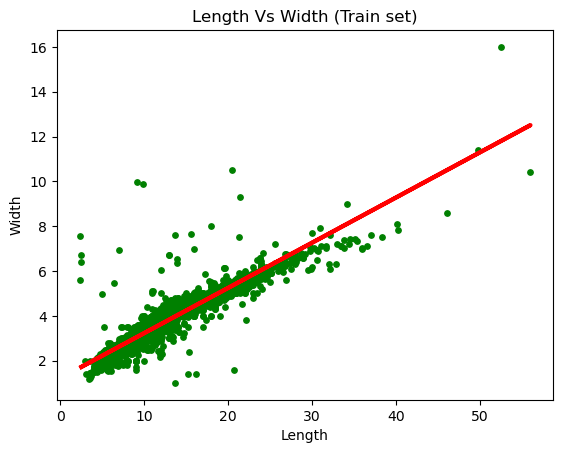

<Figure size 640x480 with 0 Axes>

In [43]:
# Training Sets Prediction - Visualization

plot_train = plt
plot_train.scatter(X_train, y_train, color='green', s = 15)
plot_train.plot(X_train, y_predicted_training, color='red', linewidth =3)
plot_train.title('Length Vs Width (Train set)')
plot_train.xlabel('Length')
plot_train.ylabel('Width')
plot_train.show()

plot_train.savefig('LengthVsWidthTrain.png')

In [44]:
df.to_csv(os.path.join(path, 'Prepared Data', '6.4_ExploratoryAnalysis.csv'))